***
***
# 使用GraphLab进行音乐推荐
***
***


In [2]:
import graphlab as gl
# set canvas to show sframes and sgraphs in ipython notebook
gl.canvas.set_target('ipynb')
import matplotlib.pyplot as plt
%matplotlib inline

# 下载数据
http://s3.amazonaws.com/dato-datasets/millionsong/10000.txt


In [3]:
#train_file = 'http://s3.amazonaws.com/dato-datasets/millionsong/10000.txt'
train_file = '/Users/chengjun/bigdata/millionsong/song_usage_10000.txt'
sf = gl.SFrame.read_csv(train_file, header=False, delimiter='\t', verbose=False)
sf.rename({'X1':'user_id', 'X2':'music_id', 'X3':'rating'}).show()

------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Read 844838 lines. Lines per second: 810295
PROGRESS: Finished parsing file /Users/chengjun/bigdata/millionsong/song_usage_10000.txt
PROGRESS: Parsing completed. Parsed 2000000 lines in 1.59616 secs.


In [4]:
(train_set, test_set) = sf.random_split(0.8, seed=1)

In [5]:
popularity_model = gl.popularity_recommender.create(train_set, 'user_id', 'music_id', target = 'rating')

PROGRESS: Recsys training: model = popularity
PROGRESS: Preparing data set.
PROGRESS:     Data has 1599753 observations with 76085 users and 10000 items.
PROGRESS:     Data prepared in: 1.23558s
PROGRESS: 1599753 observations to process; with 10000 unique items.


In [7]:
item_sim_model = gl.item_similarity_recommender.create(train_set, 'user_id', 'music_id', target = 'rating', 
                                                       similarity_type='cosine')

PROGRESS: Recsys training: model = item_similarity
PROGRESS: Preparing data set.
PROGRESS:     Data has 1599753 observations with 76085 users and 10000 items.
PROGRESS:     Data prepared in: 1.34152s
PROGRESS: Computing item similarity statistics:
PROGRESS: Computing most similar items for 10000 items:
PROGRESS: +-----------------+-----------------+
PROGRESS: | Number of items | Elapsed Time    |
PROGRESS: +-----------------+-----------------+
PROGRESS: | 1000            | 1.67234         |
PROGRESS: | 2000            | 1.70878         |
PROGRESS: | 3000            | 1.74289         |
PROGRESS: | 4000            | 1.77751         |
PROGRESS: | 5000            | 1.81794         |
PROGRESS: | 6000            | 1.85361         |
PROGRESS: | 7000            | 1.88976         |
PROGRESS: | 8000            | 1.92744         |
PROGRESS: | 9000            | 1.96709         |
PROGRESS: | 10000           | 2.08439         |
PROGRESS: +-----------------+-----------------+
PROGRESS: Finished train

In [8]:
factorization_machine_model = gl.recommender.factorization_recommender.create(train_set, 'user_id', 'music_id',
                                                                              target='rating')

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 1599753 observations with 76085 users and 10000 items.
PROGRESS:     Data prepared in: 1.31298s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 8        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 1e-08    |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | linear_regularization          | L2 Regularization on Linear Coefficie

compare_models: using 6871 users to estimate model performance
PROGRESS: Evaluate model M0
PROGRESS: recommendations finished on 1000/6871 queries. users per second: 12410
PROGRESS: recommendations finished on 2000/6871 queries. users per second: 14958.4
PROGRESS: recommendations finished on 3000/6871 queries. users per second: 15825.3
PROGRESS: recommendations finished on 4000/6871 queries. users per second: 16808.7
PROGRESS: recommendations finished on 5000/6871 queries. users per second: 17280.5
PROGRESS: recommendations finished on 6000/6871 queries. users per second: 17228

Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   2    | 0.000363848057051 | 0.000222530101733 |
|   4    | 0.000509387279872 | 0.000644168294629 |
|   6    | 0.000460874205598 | 0.000838220591723 |
|   8    | 0.000418425265609 | 0.000983759814544 |
|   10 

/Users/chengjun/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


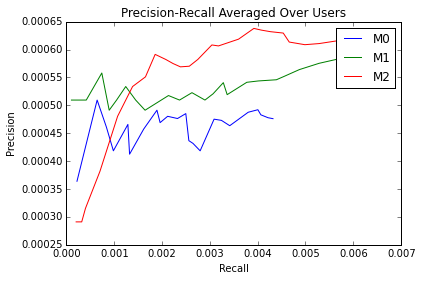

In [9]:
result = gl.recommender.util.compare_models(test_set, [popularity_model, item_sim_model, factorization_machine_model],
                                            user_sample=.1, skip_set=train_set)

In [10]:
K = 10
users = gl.SArray(sf['user_id'].unique().head(100))

In [11]:
recs = item_sim_model.recommend(users=users, k=K)
recs.head()

user_id,music_id,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,SOFCGSE12AF72A674F,20.686440678,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,SOQYHJW12AB0182AA6,20.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,SOELDGL12A8C135ED7,20.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,SOUWZPO12A6D4F83E3,20.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,SONAQRQ12AB017FD0B,20.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,SOMVIOV12A6D4F719A,20.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,SOHJWLZ12A6D4F7756,20.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,SOIRUXQ12A8C133060,20.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,SOLVHIW12A8C13BA03,20.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,SOPWZGK12A67020744,20.0,10
